In [1]:
import pandas as pd
import numpy as np
from scapy.all import *
import matplotlib.pyplot as plt
import seaborn as sns

def extract_jitter_info(pcap_file):
    packets = rdpcap(pcap_file)
    timestamps = [pkt.time for pkt in packets if pkt.haslayer(UDP)]
    jitter_values = []

    for i in range(1, len(timestamps)):
        jitter_values.append(abs(timestamps[i] - timestamps[i - 1]))

    return jitter_values



c:\users\durbek\appdata\local\programs\python\python37\lib\site-packages\scapy\layers\ipsec.py:471: CryptographyDeprecationWarning: Blowfish has been deprecated
  cipher=algorithms.Blowfish,
c:\users\durbek\appdata\local\programs\python\python37\lib\site-packages\scapy\layers\ipsec.py:485: CryptographyDeprecationWarning: CAST5 has been deprecated
  cipher=algorithms.CAST5,


In [2]:
pcap_files = ['without/tcpdump_output_{}.pcap'.format(i) for i in range(1, 11)]
jitter_data = {}

for i, file in enumerate(pcap_files):
    jitter_data[f'file_{i + 1}'] = extract_jitter_info(file)

In [3]:
jitter_df = pd.DataFrame.from_dict(jitter_data, orient='index').T
jitter_df = jitter_df.dropna(axis=1, how='all')
# Convert jitter_df to numeric data type
jitter_df = jitter_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all-NaN values
jitter_df = jitter_df.dropna(axis=1, how='all')

# Calculate median jitter values
median_jitter_without = jitter_df.median(axis=1)



# # Plot median jitter values over time
# median_jitter.plot()
# plt.title('Median Jitter Values across 10 pcap files')
# plt.xlabel('Time Index')
# plt.ylabel('Jitter (seconds)')
# plt.show()


In [4]:
pcap_files = ['with/tcpdump_output_{}.pcap'.format(i) for i in range(1, 4)]
jitter_data = {}

for i, file in enumerate(pcap_files):
    jitter_data[f'file_{i + 1}'] = extract_jitter_info(file)

In [5]:
jitter_df = pd.DataFrame.from_dict(jitter_data, orient='index').T
jitter_df = jitter_df.dropna(axis=1, how='all')
# Convert jitter_df to numeric data type
jitter_df = jitter_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all-NaN values
jitter_df = jitter_df.dropna(axis=1, how='all')

# Calculate median jitter values
median_jitter_with = jitter_df.median(axis=1)



# # Plot median jitter values over time
# median_jitter.plot()
# plt.title('Median Jitter Values across 10 pcap files')
# plt.xlabel('Time Index')
# plt.ylabel('Jitter (seconds)')
# plt.show()


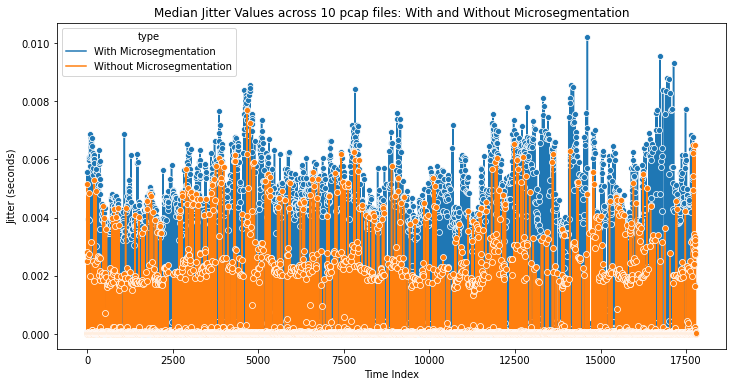

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Series to DataFrames if needed and add an index column
if isinstance(median_jitter_without, pd.Series):
    median_jitter_without = median_jitter_without.to_frame(name='jitter')
median_jitter_without['index'] = median_jitter_without.index
median_jitter_without['type'] = 'Without Microsegmentation'

if isinstance(median_jitter_with, pd.Series):
    median_jitter_with = median_jitter_with.to_frame(name='jitter')
median_jitter_with['index'] = median_jitter_with.index
median_jitter_with['type'] = 'With Microsegmentation'

# Combine the two DataFrames
combined_jitter = pd.concat([median_jitter_with, median_jitter_without], ignore_index=True)

# Use seaborn to create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_jitter, x='index', y='jitter', hue='type', marker='o')

# Customize the plot with title and labels
plt.title('Median Jitter Values across 10 pcap files: With and Without Microsegmentation')
plt.xlabel('Time Index')
plt.ylabel('Jitter (seconds)')

# Display the plot
plt.show()
